**ML ASSIGNMENT2 - Vaibhav Khare**

Vaibhav Khare - 2025ab05182@wilp.bits-pilani.ac.in

## **Ensemble Model - Random Forest on Portuguese banking institution**


***About Datset***

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

In [1]:
#Import Libraries
import os;
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Export Train, Test, Bank Details Dataset
bank_train =pd.read_csv('https://raw.githubusercontent.com/vaibhavkhare1/ML_ASSIGNMENT_COMPARISION_REPO/main/bank-full.csv');
bank_test =pd.read_csv('https://raw.githubusercontent.com/vaibhavkhare1/ML_ASSIGNMENT_COMPARISION_REPO/main/bank-test.csv')

In [3]:
#Pre Process the data

# Convert 'y' column to numerical (0 or 1)
bank_train['y'] = bank_train['y'].map({'no': 0, 'yes': 1})
bank_test['y'] = bank_test['y'].map({'no': 0, 'yes': 1})

# Separate features (X) and target (y) for both train and test sets
X_train = bank_train.drop('y', axis=1)
y_train = bank_train['y']
X_test = bank_test.drop('y', axis=1)
y_test = bank_test['y']

# Identify categorical columns for one-hot encoding
categorical_cols = X_train.select_dtypes(include='object').columns

# Apply one-hot encoding to categorical features
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Align columns - crucial for consistent feature sets between train and test
train_cols = X_train.columns
test_cols = X_test.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train[c] = 0

# Ensure the order of columns is the same
X_test = X_test[train_cols]

print("Shape of X_train after preprocessing:", X_train.shape)
print("Shape of X_test after preprocessing:", X_test.shape)
print("First 5 rows of preprocessed X_train:")
display(X_train.head())

Shape of X_train after preprocessing: (45211, 42)
Shape of X_test after preprocessing: (4521, 42)
First 5 rows of preprocessed X_train:


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1,44,29,5,151,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,33,2,5,76,1,-1,0,False,True,False,...,False,False,False,True,False,False,False,False,False,True
3,47,1506,5,92,1,-1,0,True,False,False,...,False,False,False,True,False,False,False,False,False,True
4,33,1,5,198,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [4]:
#Import libraries for Stratified K Fold, Cross Validation and Random Forest Classifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
# We use 'balanced' class_weight to handle potential class imbalance
rf_classifier_cv = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Set up Stratified K-Fold cross-validation
# StratifiedKFold ensures that each fold has approximately the same percentage of samples of each target class as the complete set
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier_cv, X_train, y_train, cv=skf, scoring='accuracy', n_jobs=-1)

print(f"Cross-validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation of CV Accuracy: {cv_scores.std():.4f}")

# You can also check other metrics if needed, e.g., 'roc_auc', 'f1', 'precision', 'recall'
cv_roc_auc_scores = cross_val_score(rf_classifier_cv, X_train, y_train, cv=skf, scoring='roc_auc', n_jobs=-1)
print(f"\nCross-validation ROC AUC Scores: {cv_roc_auc_scores}")
print(f"Mean CV ROC AUC: {cv_roc_auc_scores.mean():.4f}")

Cross-validation Accuracy Scores: [0.90578348 0.90223402 0.90311878 0.9047777  0.90544127]
Mean CV Accuracy: 0.9043
Standard Deviation of CV Accuracy: 0.0014

Cross-validation ROC AUC Scores: [0.93412317 0.93242219 0.92705171 0.93128045 0.92636662]
Mean CV ROC AUC: 0.9302


In [5]:
# Train a Random Forest Classifier.

from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
# Using a fixed random_state for reproducibility
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model
rf_classifier.fit(X_train, y_train)




RandomForestClassifier(class_weight='balanced', random_state=42)

In [6]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Get prediction probabilities for AUC score using the Random Forest Classifier
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

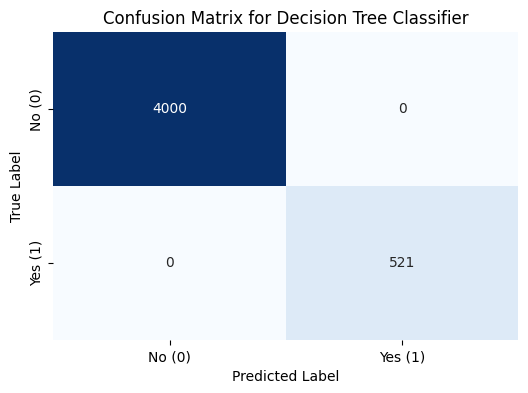

In [7]:
#Import Library for Confusion Metrix

from sklearn.metrics import confusion_matrix

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No (0)', 'Yes (1)'], yticklabels=['No (0)', 'Yes (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [8]:
# Evaluate the model using the defined functions

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, classification_report, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"AUC Score: {auc_score:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"MCC Score: {mcc:.4f}")

# Generate and print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 1.0000
AUC Score: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
MCC Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       1.00      1.00      1.00       521

    accuracy                           1.00      4521
   macro avg       1.00      1.00      1.00      4521
weighted avg       1.00      1.00      1.00      4521

